In [6]:
import pandas as pd
import numpy as np
import jieba
import gensim
import keras
import matplotlib.pyplot as plt

In [7]:
training = pd.read_csv("../dataset/training.csv")
testing = pd.read_csv("../dataset/testing.csv")

In [22]:
training.shape

(2400, 5)

In [13]:
model = gensim.models.word2vec.Word2Vec.load("./word2Vec.model")

In [14]:
def buildWordVector(imdb_w2v,text, size):
    vec = np.zeros(size).reshape((1, size))
    pad = np.zeros(size).reshape((1, size))
    count = 0
    for word in text.split():
        try:
            vec = np.vstack((vec, imdb_w2v[word].reshape((1, size)))) 
            count += 1
        except KeyError:
            print (word)
    vec = np.delete(vec, 0, 0)
#填充不满260的矩阵
    if len(vec) < 290:
        for i in range(290 - len(vec)):
            vec = np.vstack((vec, pad))
    return vec


In [15]:
text = [i for i in training["cut"]]

In [20]:
result = buildWordVector(model,training["cut"][0], 50)

for i in range(1,len(training)):
    result = np.concatenate((result, buildWordVector(model, training["cut"][0], 50)), axis = 0)
result.shape

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


(696000, 50)

In [23]:
x_all = result.reshape(2400,290,50)

In [27]:

import tensorflow as tf
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [28]:
y = training["stance"]

In [45]:
y = label_binarize(y, classes=[0,1,2])
# 随机化数据，并划分训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(x_all, y, test_size=0.1,random_state=0)

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv1D, Embedding, Dropout, MaxPool1D, GlobalMaxPool1D,Lambda, LSTM, TimeDistributed
from keras.optimizers import Adam
import keras
from keras.optimizers import SGD
opt = SGD(lr=0.01)

model_cnn = Sequential()
 
model_cnn.add(Conv1D(input_shape = (290,50),filters=25,kernel_size=3, padding='valid', activation='sigmoid',strides=1))
model_cnn.add(GlobalMaxPool1D())
model_cnn.add(Dense(y.shape[1], activation='softmax'))
# model_cnn.add(Dropout(0.2))
model_cnn.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
model_cnn.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 288, 25)           3775      
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 25)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 78        
Total params: 3,853
Trainable params: 3,853
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_cnn.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Train on 2160 samples, validate on 240 samples
Epoch 1/10
2160/2160 [==============================] - 1s 586us/step - loss: 1.1587 - acc: 0.4167 - val_loss: 1.1002 - val_acc: 0.3708
Epoch 2/10
2160/2160 [==============================] - 1s 351us/step - loss: 1.0612 - acc: 0.4153 - val_loss: 1.0824 - val_acc: 0.3708
Epoch 3/10
2160/2160 [==============================] - 1s 343us/step - loss: 1.0587 - acc: 0.4139 - val_loss: 1.0823 - val_acc: 0.3708
Epoch 4/10
2160/2160 [==============================] - 1s 351us/step - loss: 1.0587 - acc: 0.4153 - val_loss: 1.0803 - val_acc: 0.3708
Epoch 5/10
2160/2160 [==============================] - 1s 343us/step - loss: 1.0586 - acc: 0.4167 - val_loss: 1.0834 - val_acc: 0.3708
Epoch 6/10
2160/2160 [==============================] - 1s 354us/step - loss: 1.0587 - acc: 0.4167 - val_loss: 1.0781 - val_acc: 0.3708
Epoch 7/10
2160/2160 [==============================] - 1s 345us/step - loss: 1.0585 - acc: 0.4167 - val_loss: 1.0773 - val_acc: 0.3708
E

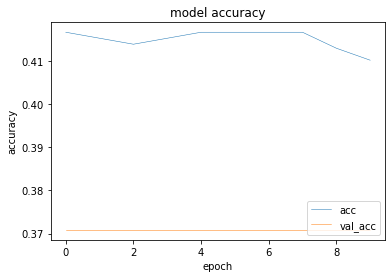

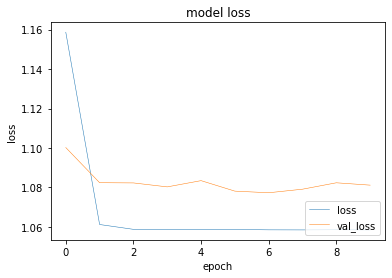

In [64]:

a = model_cnn.history
plt.plot(a.history['acc'], linewidth=0.5)
plt.plot(a.history['val_acc'],linewidth=0.5)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc = 'lower right')
plt.show()
 
plt.plot(a.history['loss'], linewidth=0.5)
plt.plot(a.history['val_loss'], linewidth=0.5)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'], loc='lower right')
plt.show()
